In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [3]:
df=pd.read_csv('/Users/taliyas/Downloads/brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.shape

(4981, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
#Encoding
df['gender'] = df['gender'].map({'Female':1,'Male':0})
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['work_type'] = df['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job':2, 'children':3})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural':0})
df['smoking_status'] = df['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,0,80.0,0,1,1,0,0,105.92,32.5,1,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,1,1
4,0,81.0,0,0,1,0,1,186.21,29.0,0,1


In [8]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print('x shape: ',x.shape,'\ny shape: ' , y.shape)

x shape:  (4981, 10) 
y shape:  (4981,)


In [9]:
#count number of ones and zeros
from collections import Counter
Counter(y)

Counter({1: 248, 0: 4733})

In [10]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)
Counter(y_data)

Counter({1: 4733, 0: 4733})

In [11]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_data=scale.fit_transform(x_data)
x_data

array([[-1.22821785,  0.53164321, -0.507138  , ...,  1.99273079,
         1.24270834, -1.40453946],
       [-1.22821785,  1.11972908, -0.507138  , ..., -0.23233376,
         0.55654482, -0.42133997],
       [ 0.9510412 , -0.28262954, -0.507138  , ...,  0.95133461,
         0.87452304,  0.56185952],
       ...,
       [ 0.9510412 , -0.07485815,  2.48379353, ...,  1.10219841,
        -0.19226567, -0.42133997],
       [ 0.9510412 ,  0.67888448, -0.507138  , ...,  2.17224183,
        -0.42390332, -0.48398427],
       [ 0.86271343,  0.85563892, -0.507138  , ...,  2.05016274,
         0.87204367, -1.40453946]])

In [34]:
X_train, X_test, y_train, y_test  = train_test_split(x_data,y_data, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val \
     = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
y_train = y_train.reshape((y_train.shape[0],1))
y_val = y_val.reshape((y_val.shape[0],1))
y_test = y_test.reshape((y_test.shape[0],1))
print("X_train shape: ",X_train.shape)
print("X_val shape: ",X_val.shape)
print("y_train: ",y_train.shape)
print("y_val: ",y_val.shape)

X_train shape:  (5679, 10)
X_val shape:  (1893, 10)
y_train:  (5679, 1)
y_val:  (1893, 1)


In [46]:
# Reshape the padded data to have an additional time dimension
X_train_time = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val_time = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test_time = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

print('X_train_time shape:' ,X_train_time.shape)
print('X_val_time shape:' ,X_val_time.shape)
print('X_test_time shape:' ,X_test_time.shape)

X_train_time shape: (5679, 1, 10)
X_val_time shape: (1893, 1, 10)
X_test_time shape: (1894, 1, 10)


Epoch 1/800
19/19 [==============================] - 3s 31ms/step - loss: 0.6561 - accuracy: 0.6948 - val_loss: 0.6398 - val_accuracy: 0.7258
Epoch 2/800
19/19 [==============================] - 0s 5ms/step - loss: 0.6244 - accuracy: 0.7195 - val_loss: 0.6111 - val_accuracy: 0.7359
Epoch 3/800
19/19 [==============================] - 0s 5ms/step - loss: 0.5979 - accuracy: 0.7306 - val_loss: 0.5870 - val_accuracy: 0.7412
Epoch 4/800
19/19 [==============================] - 0s 5ms/step - loss: 0.5752 - accuracy: 0.7360 - val_loss: 0.5667 - val_accuracy: 0.7480
Epoch 5/800
19/19 [==============================] - 0s 5ms/step - loss: 0.5567 - accuracy: 0.7431 - val_loss: 0.5497 - val_accuracy: 0.7496
Epoch 6/800
19/19 [==============================] - 0s 5ms/step - loss: 0.5412 - accuracy: 0.7493 - val_loss: 0.5357 - val_accuracy: 0.7554
Epoch 7/800
19/19 [==============================] - 0s 5ms/step - loss: 0.5283 - accuracy: 0.7545 - val_loss: 0.5236 - val_accuracy: 0.7618
Epoch 8/800


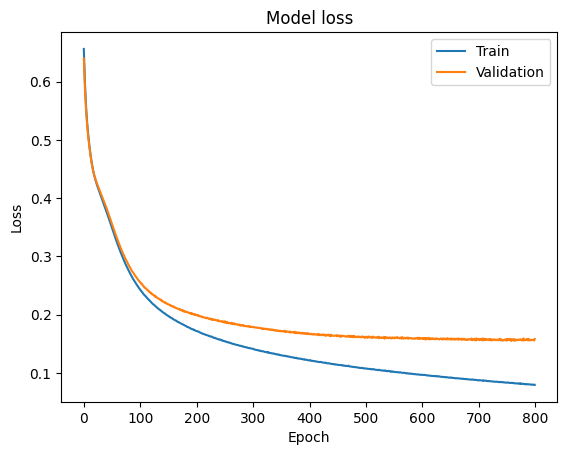

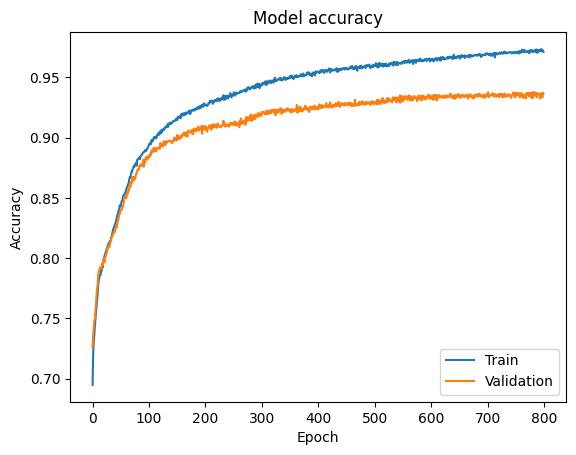

In [49]:

# Define the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(None, 10)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(X_train_time, y_train, epochs=800, batch_size=300, validation_data=(X_val_time, y_val))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_time, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Plot the loss and accuracy over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
